## Dependencies

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import inflection
import warnings

warnings.filterwarnings('ignore')
pd.set_option('max_columns', 50)

## Load the dataset

In [2]:
df = pd.read_csv('../dataset/Clicked_Ads_Dataset.csv')
df.sample()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
812,812,84.25,32,447555500.0,170.9,Laki-Laki,4/10/2016 6:32,No,Semarang,Jawa Tengah,Travel


## Lowercase column names

In [3]:
df = df.drop(["Unnamed: 0"], axis=1)
df.columns = [inflection.underscore(col) for col in df.columns]
df.columns = df.columns.str.replace(" ", "_")
df.sample()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,timestamp,clicked_on_ad,city,province,category
754,76.87,36,510641320.0,212.59,Perempuan,7/8/2016 22:30,No,Surabaya,Jawa Timur,Electronic


## Exploratory Data Analysis (EDA)

In [4]:
df.shape

(1000, 10)

In [11]:
from common_function import dataset_summary
summary = dataset_summary(df)
summary.T

,0,1,2,3,4,5,6,7,8,9
variable,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,timestamp,clicked_on_ad,city,province,category
no_unique,890,43,987,955,2,997,2,30,16,10
pandas_dtype,float64,int64,float64,float64,object,object,object,object,object,object
missing_value,13,0,13,11,3,0,0,0,0,0
%_missing_values,1.3,0.0,1.3,1.1,0.3,0.0,0.0,0.0,0.0,0.0
unique_value,"[68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88....","[35, 31, 26, 29, 23, 33, 48, 30, 20, 49, 37, 2...","[432837300.0, 479092950.00000006, 418501580.0,...","[256.09, 193.77, 236.5, 245.89, 225.58, 226.74...","[Perempuan, Laki-Laki, nan]","[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3...","[No, Yes]","[Jakarta Timur, Denpasar, Surabaya, Batam, Med...","[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim...","[Furniture, Food, Electronic, House, Finance, ..."


**Observasi**
* Dataset memiliki **1000 baris** dan **10 kolom** dengan rincian 4 kolom numerikal dan 6 kolom kategorikal.
* Seluruh kolom memiliki tipe data yang sesuai dengan jenis variabelnya namun untuk **timestamp** butuh di-parsing ke tipe **datetime**.
* Ada empat kolom yang memiliki missing values yaitu **daily_time_spent_on_site**, **area_income**, **daily_internet_usage**, dan **male**. Jumlah missing values hanya sekitar **1%** dari total baris dataset.

In [16]:
# split numerical and categorical columns
numerical = ['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage']
categorical = ['male', 'timestamp', 'city', 'province', 'category']
target = 'clicked_on_ad'

### Descriptive Statistics

In [12]:
df[numerical].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
daily_time_spent_on_site,987.0,6.493000e+01,15.84,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
age,1000.0,3.601000e+01,8.79,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
area_income,987.0,3.848647e+08,94079989.57,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
daily_internet_usage,989.0,1.798600e+02,43.87,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


Dari nilai **mean** dan **median** dapat diperkirakan distribusi dari suatu feature. Berikut ini kemungkinan distribusi setiap feature.
* **daily_time_spent_on_site** dan **area_income** memiliki distribusi **skewed** karena perbedaan nilai mean dan median yang agak jauh.
* **age** dan **daily_internet_usage** memiliki distribusi mendekati **normal** karena perbedaan nilai mean dan median dekat.

In [15]:
desc_cats = df[categorical].describe().T
desc_cats['frac'] = 100 * desc_cats['freq'] / desc_cats['count']
desc_cats

,count,unique,top,freq,frac
male,997,2,Perempuan,518,51.955868
timestamp,1000,997,5/26/2016 15:40,2,0.2
clicked_on_ad,1000,2,No,500,50.0
city,1000,30,Surabaya,64,6.4
province,1000,16,Daerah Khusus Ibukota Jakarta,253,25.3
category,1000,10,Otomotif,112,11.2


**Observasi**
* Gender yang mendominasi adalah **Perempuan** dengan jumlah **52%** dari seluruh jumlah baris.
* Jumlah kategori **Yes** dan **No** pada kolom **clicked_on_ad** seimbang.
* Kota yang paling banyak muncul di dataset adalah **Surabaya** sedangkan untuk provinsi adalah **DKI Jakarta**.
* **Otomotif** merupakan kategori yang paling sering dikunjungi user dengan persentase **11%**.

### Univariate analysis

In [26]:
df.groupby('clicked_on_ad').agg({
    'daily_time_spent_on_site': 'median', 
    'age': 'median', 
    'area_income': 'median', 
    'daily_internet_usage': 'median'
})

,daily_time_spent_on_site,age,area_income,daily_internet_usage
clicked_on_ad,,,,
No,77.615,31.0,436334990.0,216.50
Yes,51.500,40.0,344980090.0,138.79


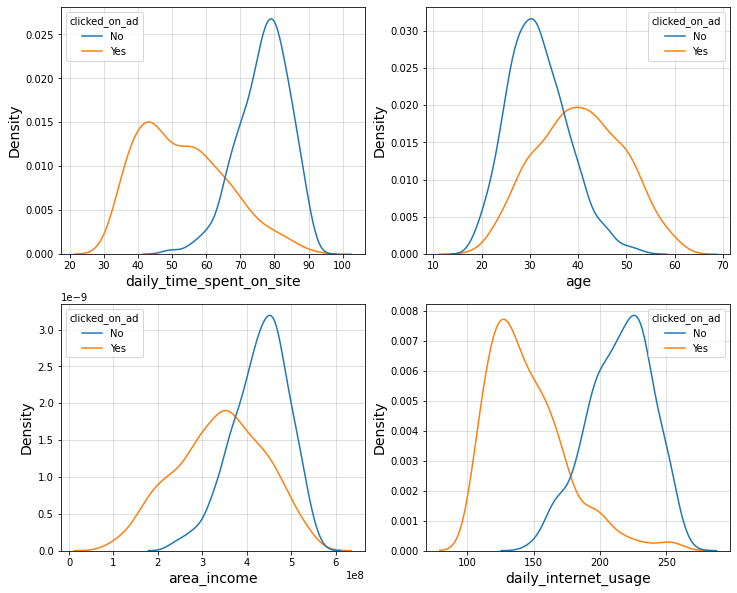

In [24]:
plt.figure(figsize=(12,10))
for i, col in enumerate(numerical):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(
        x=df[col],
        hue=df['clicked_on_ad'],
    )
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.grid(axis='y', alpha=0.5)

plt.show()

In [27]:
df.groupby('clicked_on_ad').agg({
    'daily_time_spent_on_site': 'median', 
    'age': 'median', 
    'area_income': 'median', 
    'daily_internet_usage': 'median'
})

,daily_time_spent_on_site,age,area_income,daily_internet_usage
clicked_on_ad,,,,
No,77.615,31.0,436334990.0,216.50
Yes,51.500,40.0,344980090.0,138.79


**Observasi**
* User yang mengklik ad (Yes) merupakan user dengan **daily time spent on site** sebesar **51,5 menit** yang mana berbeda sekitar 26 menit dengan user yang tidak mengklik ad (No) (**77,6 menit**).
* Rata-rata umur user yang mengklik ad sekitar **40 tahun** sedangkan yang tidak mengklik ad **31 tahun**.
* **Daily internet usage** pada user yang mengklik ad sebesar **138.8 menit** rata-rata sedangkan untuk user yang tidak mengklik ad sebesar **216.5 menit**.